In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction to Optimization Problems

# Reaching Stationary Points with Gradient Descent


Example for learning gradient descent

In [11]:
np.random.seed(101)

In [12]:
n, d = 100, 3   # 100 Sample, 3 Feature
X = np.random.rand(n, d) # Generate random number for samples
X = np.column_stack((np.ones((100, 1)), X)) # Add Factor of one for w_0 feature
w = np.array([3, 2, 6, 1]) # Determination weights of each feature 

y = np.dot(X, w.reshape(-1, 1)) + np.random.randn(100, 1)


## What is the Cost Function?

The primary set-up for learning neural networks is to define a cost function (also known as a loss function) that measures how well the network predicts outputs on the test set. The goal is to then find a set of weights and biases that minimizes the cost. One common function that is often used is the mean squared error, which measures the difference between the actual value of $ y $ and the estimated value of y (the prediction). The equation of the below regression line is $ h_θ(x) = θ + θ_1 x $ , which has only two parameters: weight $ (θ_1) $ and bias $ (θ_0) $.


![cost_piucture](./pictures/cost.png)

The goal is to select a set of parameters w ∈ W to minimize a given
objective function
$$
\arg\min_{w \in W} c(w)
$$

For example, to obtain the parameters $w \in \mathbb{R}^d$ for linear regression that minimizes the squared differences, We use $c(w) = \sum_{i=1}^n (\langle x_i, w \rangle - y_i)^2$, for dot product.

$$
\langle x_i, w \rangle = \sum_{j=1}^{d} x_{ij} w_j
$$


The derivative tells us the rate of change of the function surface at a point
w. When the derivative of the objective is zero at w ∈ R, i.e., d
dw c(w) = 0, this means that
locally the function surface is flat.

> note: the second derivative tells us the local curvature of the function. It tells us how the derivative is changing. If the slope of the derivative $c′(w_0)$ is positive at $w_0$, namely $c′′(w_0) > 0$, then we know that the derivative is increasing; if it is negative, then it is decreasing.


In [13]:
def cost_function(X, y, w):
    n, d = X.shape
    y_predict = X @ w 
    # Where y_predict is the vector of predicted target values with shape (n, 1).
    # The cost function used in linear regression is typically the Mean Squared Error (MSE):
    # J(w) = (1/n) * Σ(y_pred - y)^2 OR J(w) = (1/2 * n) * Σ(y_pred - y)^2
    return np.sum((y - y_predict) ** 2) / (2 * n)

## Minimising Cost function


> The goal of any Machine Learning model is to minimize the Cost Function.

![minimize_cost](./pictures/minimize_cost.png)

## How to Minimise the Cost Function

Our goal is to move from the mountain in the top right corner (high cost) to the dark blue sea in the bottom left (low cost). In order to get the lowest error value, we need to adjust the weights ‘θ0’ and ‘θ1’ to reach the smallest possible error. This is because the result of a lower error between the actual and the predicted values means the algorithm has done a good job in learning. Gradient descent is an efficient optimization algorithm that attempts to find a local or global minimum of a function.

### Calculating gradient descent


Gradient Descent runs iteratively to find the optimal values of the parameters corresponding to the minimum value of the given cost function, using calculus. Mathematically, the technique of the ‘derivative’ is extremely important to minimise the cost function because it helps get the minimum point. The derivative is a concept from calculus and refers to the slope of the function at a given point. We need to know the slope so that we know the direction (sign) to move the coefficient values in order to get a lower cost on the next iteration.

![gradient_descent](./pictures/gd.png)

To find the optimal weight vector $w$, we need to minimize the cost function $J(w)$ using an optimization algorithm like gradient descent. This requires computing the gradient of $J(w)$ with respect to $w$.
The gradient of $J(w)$ with respect to $w$ is given by:

```math
∇J(w) = (2/n) * X^T * (X @ w - y)
```

---

in another words:
The objective of linear regression is to find the weight vector w that minimizes the mean squared error (MSE) cost function:

$$
cost_{(w)} = \frac{1}{n} \sum_i{( \langle x_i, w \rangle - y_i )}^2
$$ 

To minimize the MSE cost function using gradient descent, we need to compute the gradient of the cost function with respect to the weight vector w:

$$
\frac{d}{dw}cost_{(w)} = \frac{d}{dw} \sum_{i=1}^{n}{(\langle x_i, w \rangle - y_i )}^2
$$
$$
=  \sum_{i=1}^{n}{ \frac{2}{n} {(\langle x_i, w \rangle - y_i )}^{2-1} (x_i)}
$$

**Using matrix notation, we can rewrite the gradient as:**
$$
∇_w MSE \ \ OR \ \ \frac{d}{dw}cost_{(w)} = \frac{2}{n} {(\langle x, w \rangle - y_i )}^{2} (x.T)
$$

x.T is the transpose of the input data matrix x.

In [14]:
def gradient(X, y, w):
    n, d = X.shape
    grad = (X.T @ ((X @ w) - y)) / n
    return grad

In [15]:
def line_search(X, y, w, alpha=0.001, beta=0.7):
    cost = cost_function(X, y, w)
    grad = gradient(X, y, w)
    step_size = 5

    while cost_function(X, y, w - step_size * grad) > cost + alpha:
        step_size = beta * step_size

    return step_size

In [16]:
def gradient_descent(X, y, alpha=0.001, beta=0.7, num_iterate=100):
    n, d = X.shape
    w = np.zeros((d, 1))

    costs = []
    for i in range(num_iterate):
        step_size = line_search(X, y, w, alpha, beta)
        w = w - step_size * gradient(X, y, w)
        costs.append(cost_function(X, y, w))
        
    return w, costs

In [17]:
w_pred, gd_costs = gradient_descent(X, y, num_iterate=50)


In [18]:
w_pred

array([[2.84741304],
       [2.31830008],
       [6.02281899],
       [0.92461418]])

In [19]:
(X @ w_pred).shape

(100, 1)

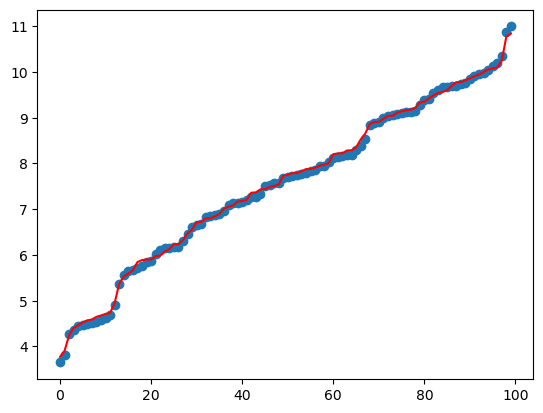

In [20]:
plt.scatter(x = np.arange(len(sorted(X @ w_pred))), y =sorted((X @ w_pred)))
plt.plot(np.arange(len(sorted(X @ w))), sorted(X @ w), color='red')


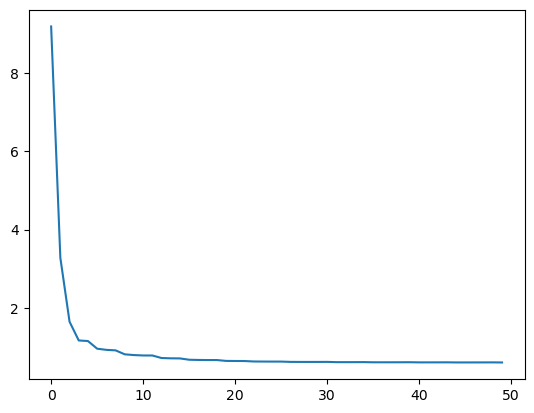

In [21]:
plt.plot(
    range(len(gd_costs)),
    gd_costs
)